
# CPE 313 : Advanced Machine Learning with Deep Learning
## HOA 1.1 Using Tensorflow with a Real Dataset

*   Name: Corpuz, Micki Laurren

---



# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Examine a [dataset](https://developers.google.com/machine-learning/glossary/#data_set).
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) in building a model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [2]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values).

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [3]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

### Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [4]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


<Axes: >

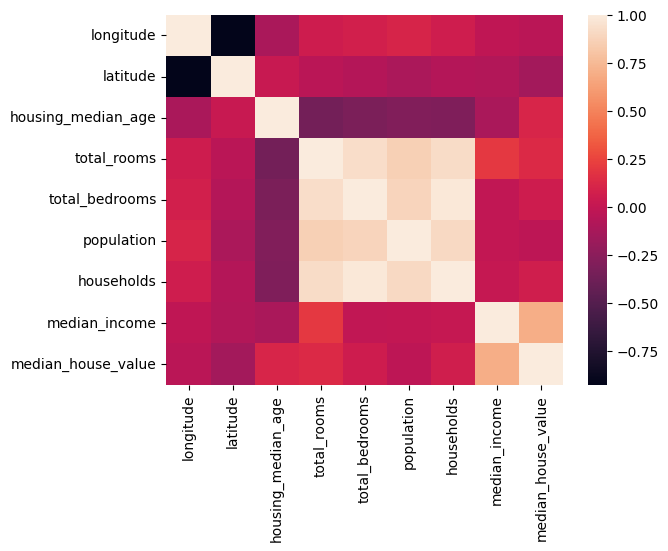

In [22]:
import seaborn as sns

corr = training_df.corr()

sns.heatmap(corr)

In [26]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data?

> Some strange values stand out, especially in total_rooms, total_bedrooms, population, and households, where the maximum values are much higher than what most of the data shows. Median_income also has a few unusually high values compared to the rest. On the other hand, longitude, latitude, and housing_median_age look fairly normal and don’t show extreme outliers.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [10]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [12]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Weight and bias are scalars
  w = float(trained_weight)
  b = float(trained_bias)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = b
  x1 = random_examples[feature].max()
  y1 = b + (w * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.


Epoch 1/256


c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - loss: 29036.0273 - root_mean_squared_error: 170.3996
Epoch 2/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 27966.2520 - root_mean_squared_error: 167.2311
Epoch 3/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 27141.5586 - root_mean_squared_error: 164.7469
Epoch 4/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 26505.4355 - root_mean_squared_error: 162.8049
Epoch 5/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 25793.4277 - root_mean_squared_error: 160.6033
Epoch 6/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 25039.3828 - root_mean_squared_error: 158.2384
Epoch 7/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 24430.6758 - root_mean_squared_error: 156.3031
Epoch 8/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 23885.0234 - root_mean_squared_error: 154.5478
Epoch 9/256
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 23215.8750 - root_mean_squared_error: 152.3676
Epoch 10/256
532/532 ━

C:\Users\micki\AppData\Local\Temp\ipykernel_22432\62330301.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nThe learned weight for your model is %.4f" % weight)
C:\Users\micki\AppData\Local\Temp\ipykernel_22432\62330301.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The learned bias for your model is %.4f\n" % bias )
C:\Users\micki\AppData\Local\Temp\ipykernel_22432\2255290996.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(

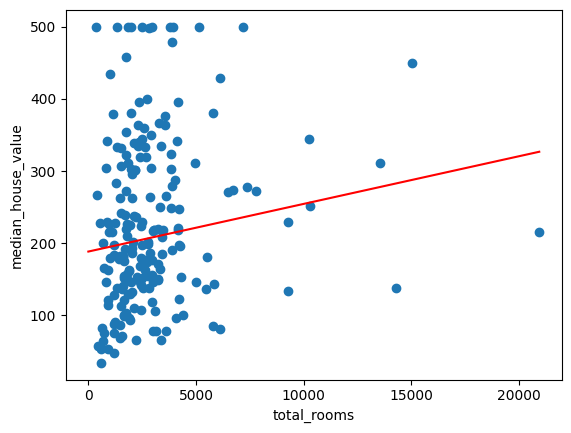

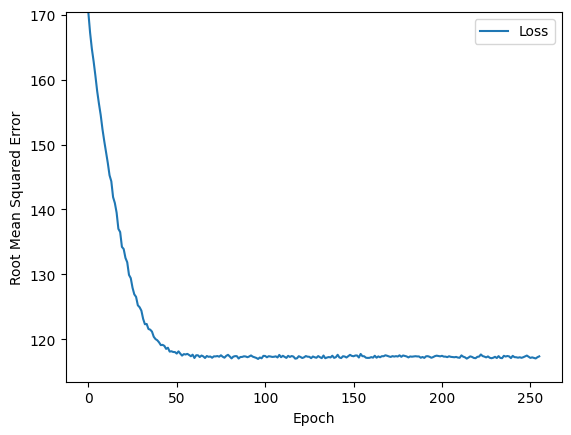

In [33]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 256
batch_size = 32

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [14]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [15]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             177
 3400     92             210
 3677     69             217
 2202     62             183
 2403     80             188
 5652    295             262
 3318    500             209
 2552    342             191
 1364    118             164
 3468    128             212


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

> Using percent error, predictions start off extremely inaccurate—spiking around 226% above the actual values—and then gradually improve, dropping to about 65% error by the tenth iteration. This suggests the model struggles to capture the true relationship between the chosen feature (total_rooms) and label (median house values. Still, these first few cases may not fully represent the dataset, so the model’s overall predictive power could differ when evaluated more broadly

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

In [24]:
training_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

Epoch 1/128


c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - loss: 815981.0000 - root_mean_squared_error: 903.3167  
Epoch 2/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 58412.1797 - root_mean_squared_error: 241.6861 
Epoch 3/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 30832.9863 - root_mean_squared_error: 175.5932
Epoch 4/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 30769.1523 - root_mean_squared_error: 175.4114
Epoch 5/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 30730.8496 - root_mean_squared_error: 175.3022
Epoch 6/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 30519.0430 - root_mean_squared_error: 174.6970
Epoch 7/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 30451.1953 - root_mean_squared_error: 174.5027
Epoch 8/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 30442.6973 - root_mean_squared_error: 174.4784
Epoch 9/128
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 30263.0996 - root_mean_squared_error: 173.9629
Epoch 10/128
532/5

C:\Users\micki\AppData\Local\Temp\ipykernel_22432\2255290996.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(trained_weight)
C:\Users\micki\AppData\Local\Temp\ipykernel_22432\2255290996.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(trained_bias)


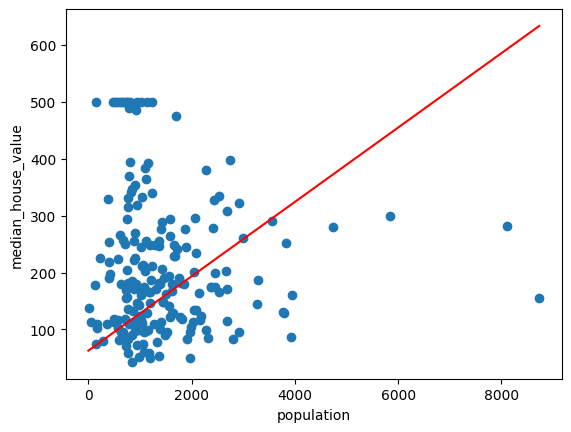

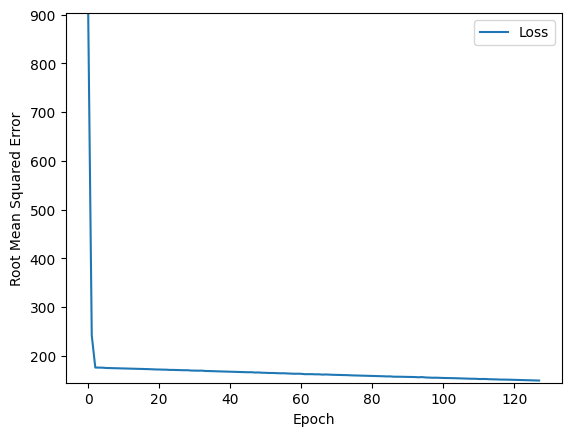

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             147
 1867     92             185
 2191     69             206
 1052     62             131
 1647     80             170
 2312    295             214
 1604    500             168
 1066    342             132
  338    118              85
 1604    128             168
 1200    187             141
  292     80              82
 2014    112             194
 1817     95             181
 1328     69             150


In [34]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.001
epochs = 128
batch_size = 32

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/18


c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 802us/step - loss: 41442.5352 - root_mean_squared_error: 203.5744 
Epoch 2/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 817us/step - loss: 19937.4512 - root_mean_squared_error: 141.2000
Epoch 3/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 944us/step - loss: 18317.3809 - root_mean_squared_error: 135.3417
Epoch 4/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 17744.2500 - root_mean_squared_error: 133.2076
Epoch 5/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 842us/step - loss: 18127.0254 - root_mean_squared_error: 134.6366
Epoch 6/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 861us/step - loss: 18158.4492 - root_mean_squared_error: 134.7533
Epoch 7/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 802us/step - loss: 18041.1641 - root_mean_squared_error: 134.3174
Epoch 8/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 4s 785us/step - loss: 18312.9805 - root_mean_squared_error: 135.3255
Epoch 9/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 5s 833us/step - loss: 18465.4902 - root_mean_squared_error: 135.8878
Epoch 10/18
5

C:\Users\micki\AppData\Local\Temp\ipykernel_22432\2255290996.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(trained_weight)
C:\Users\micki\AppData\Local\Temp\ipykernel_22432\2255290996.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(trained_bias)


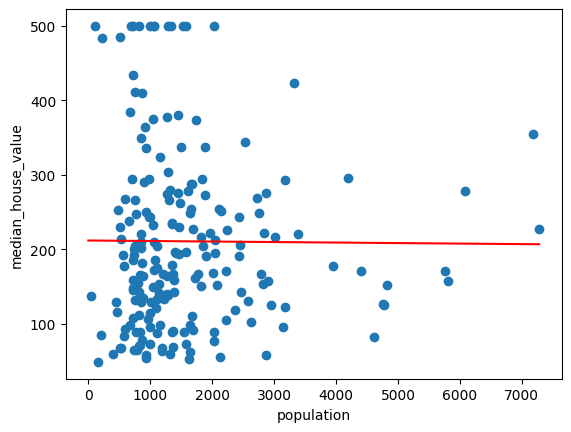

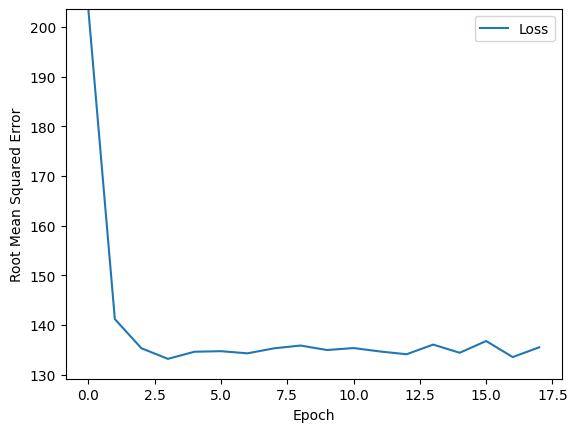

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             211
 1867     92             211
 2191     69             210
 1052     62             211
 1647     80             211
 2312    295             210
 1604    500             211
 1066    342             211
  338    118             212
 1604    128             211


In [ ]:
my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Did `population` produce better predictions than `total_rooms`?

> Using population usually ended up with a a higher RMSE than total_rooms. This suggests that population performs a bit worse than total_rooms when it comes to making predictions.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

Epoch 1/24


c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 38772.3594 - root_mean_squared_error: 196.9070
Epoch 2/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 19060.9531 - root_mean_squared_error: 138.0614
Epoch 3/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 15217.3223 - root_mean_squared_error: 123.3585
Epoch 4/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 14845.8965 - root_mean_squared_error: 121.8437
Epoch 5/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14681.0723 - root_mean_squared_error: 121.1655
Epoch 6/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 14444.9307 - root_mean_squared_error: 120.1871
Epoch 7/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 14304.4619 - root_mean_squared_error: 119.6013
Epoch 8/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 14182.6895 - root_mean_squared_error: 119.0911
Epoch 9/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 14065.9951 - root_mean_squared_error: 118.6002
Epoch 10/24
567/567 ━━━━━━━━━━━━

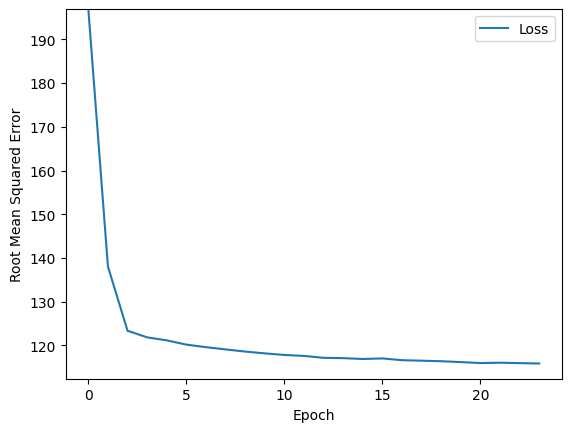

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             202
    2     69             196
    2     62             213
    1     80             187
    2    295             227
    2    500             212
    2    342             225
    4    118             292
    2    128             216
    2    187             226
    3     80             237
    2    112             227
    2     95             221
    2     69             212


In [35]:
# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [36]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

<Axes: >

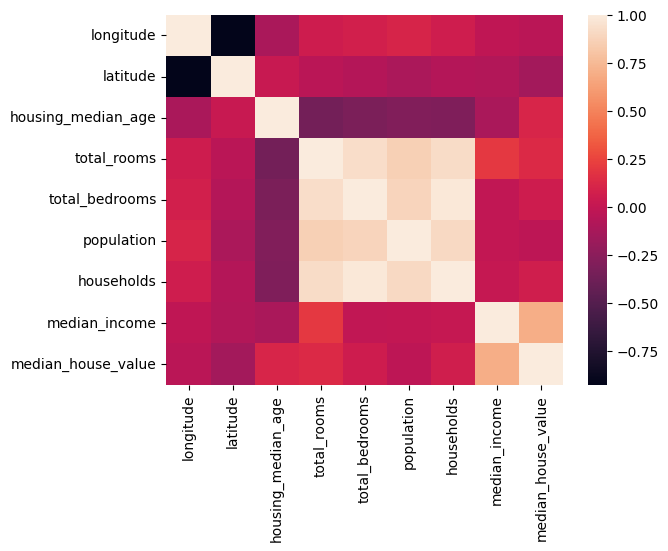

In [37]:
import seaborn as sns
sns.heatmap(corr)

> Median_income shows a strong correlation of about 0.7 with the median_house_value, which suggests it could be a good feature to use. The other features have correlations close to zero, so they don’t seem very helpful for prediction. If I have time, I can try using median_income as the feature to check if it improves the model’s performance.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.